In [181]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

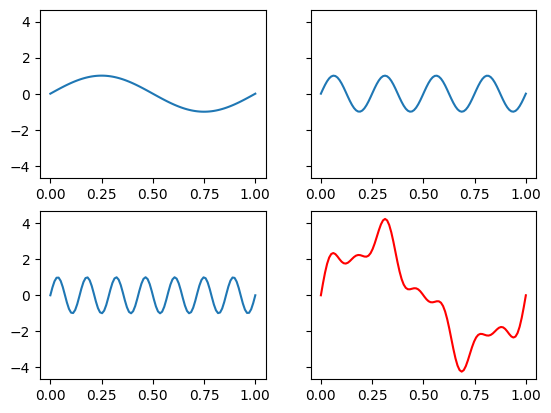

In [147]:
N = 100 # number sample
T = 1 # Total time

t, step = np.linspace(0, T, N, retstep=True)

f = 1
samples_1 = np.sin(2 * np.pi * f * t)

f = 4
samples_2 = np.sin(2 * np.pi * f * t)

f = 7
samples_3 = np.sin(2 * np.pi * f * t)

# Sum of the signals
samples_4 = 3 * samples_1 + samples_2 + 0.5 * samples_3 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
ax1.plot(t, samples_1)
ax2.plot(t, samples_2)
ax3.plot(t, samples_3)
ax4.plot(t, samples_4, 'red')
plt.show()

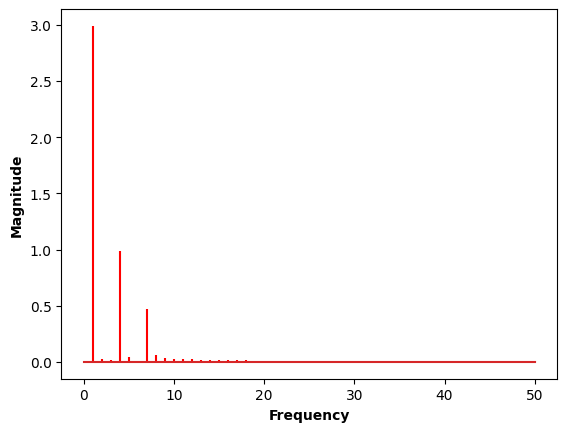

In [148]:
fft_samples_4 = np.fft.rfft(samples_4, n=N, axis=-1, norm=None)
fft_samples_4 /= (N//2) # scaling
freq = np.fft.rfftfreq(N, d=T/N)

plt.stem(freq, np.abs(fft_samples_4), 'red', markerfmt=" ")
plt.xlabel('Frequency', weight='bold')
plt.ylabel('Magnitude', weight='bold')
plt.show()

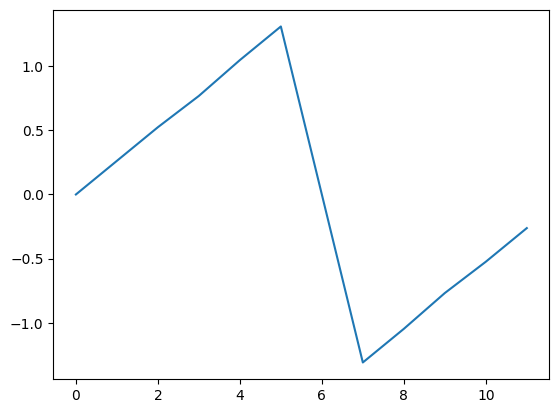

In [245]:
samples = [0, 0.262, 0.524, 0.768, 1.047, 1.309, 0, -1.309, -1.047, -0.768, -0.524, -0.262]
N = len(samples)

plt.plot(samples)
plt.show()

[ 0.00000000e+00+0.j          1.66533454e-16-5.82805182j
 -1.66533454e-16+2.71931977j  0.00000000e+00-1.606j
  2.77555756e-16+0.90759462j -2.77555756e-16-0.38594818j
  0.00000000e+00+0.j        ]


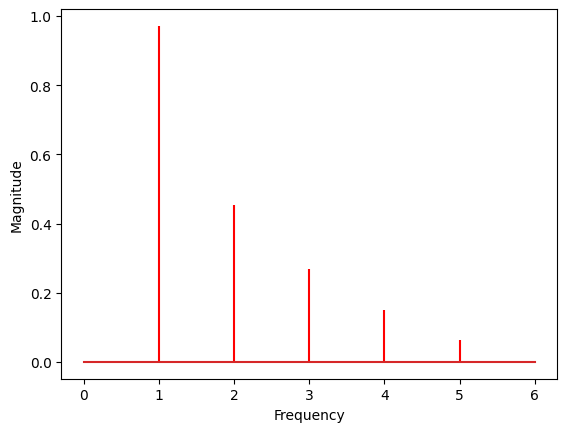

In [246]:
fft_samples = np.fft.rfft(samples, n=N, axis=-1, norm=None)
print(fft_samples)

plt.stem(np.abs(fft_samples/(N//2)), 'red', markerfmt=" ")
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

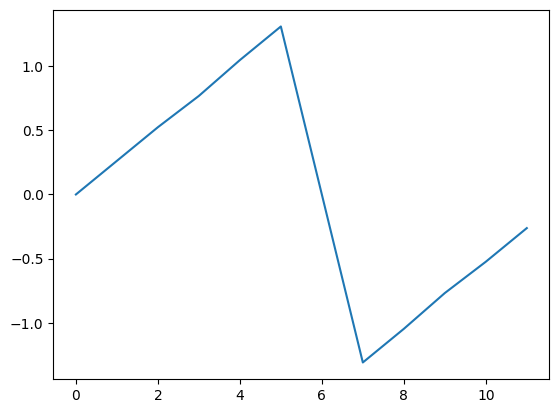

In [263]:
inv_fft_samples = np.fft.irfft(fft_samples)

plt.plot(inv_fft_samples)
plt.show()

In [121]:
import wave

with wave.open('../samples/dentdescie1k.wav') as w:
    framerate = w.getframerate()
    frames = w.getnframes()
    duration = frames/framerate
    channels = w.getnchannels()
    width = w.getsampwidth()
    print(f'{framerate=} Hz')
    print(f'{frames=} samples')
    print(f'{duration=} s')
    print(f'{channels=}')
    print(f'{width=} bytes')
    
    data = w.readframes(frames)

framerate=44100 Hz
frames=1323000 samples
duration=30.0 s
channels=1
width=2 bytes


In [120]:
sig = np.frombuffer(data, dtype='<i2')
print(sig)
print(f'{sig.min()=}')
print(f'{sig.max()=}')

[    1  1187  2380 ... -3569 -2375 -1191]
sig.min()=-26161
sig.max()=26162


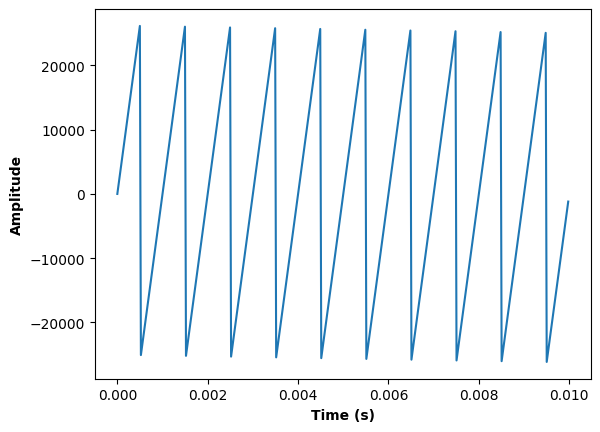

In [151]:
# framerate=44100 Hz
# => 1 sec = 44100 samples
# => 0.01 sec = 441 samples
t, time_step = np.linspace(0, duration, frames, retstep=True)

plt.plot(t[0:441], sig[0:441])
plt.xlabel('Time (s)', weight='bold')
plt.ylabel('Amplitude', weight='bold')
plt.show()

In [116]:
sig_normalized = np.interp(sig, (sig.min(), sig.max()), (-1, +1))

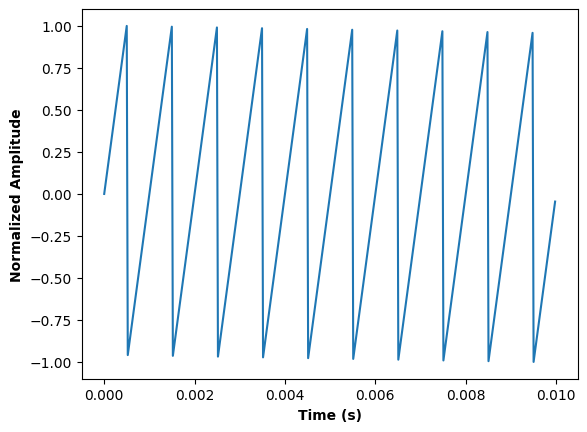

In [144]:
plt.plot(t[0:441], sig_normalized[0:441])
plt.xlabel('Time (s)', weight='bold')
plt.ylabel('Normalized Amplitude', weight='bold')
plt.show()

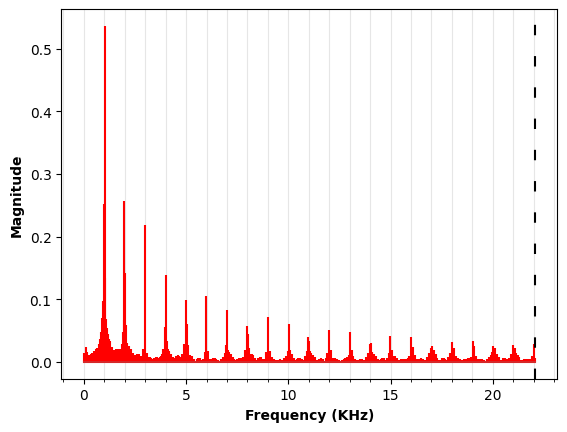

In [231]:
n = 1000 # calculate the fft only on the first 1000 samples
fft_sig_normalized = np.fft.rfft(sig_normalized, n=n)

fig, ax = plt.subplots()
ax.stem(freq, np.abs(fft_sig_normalized/(n//2)), 'red', markerfmt=" ")
ax.axvline(x=framerate//2, ls=(0, (5, 10)), color='black')
ax.set_xlabel('Frequency (KHz)', weight='bold')
ax.set_ylabel('Magnitude', weight='bold')

ax.xaxis.set_major_locator(MultipleLocator(5000))
ax.xaxis.set_major_formatter(lambda x, pos: f'{int(x/1000)}')
ax.xaxis.set_minor_locator(MultipleLocator(1000))

plt.grid(axis='x', which='both', color='0.9')

plt.show()